In [1]:
class Ad:
    def __init__(self):
        self.N = 0
        self.R = []
        self.TR = 0
        self.AR = 0
        self.UCB = 1e400
        
    def reward(self , rew, n):
        from math import sqrt ,  log10
        self.N +=1
        self.R.append(rew)
        self.TR +=rew
        self.AR = self.TR/self.N
        try:
            self.UCB = self.AR + sqrt(1.5*log10(n)/self.N)
        except:
            pass
        
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")
Data = np.matrix(dataset)

a,b = Data.shape

ADS = [Ad(),Ad(),Ad(),Ad(),Ad(),Ad(),Ad(),Ad(),Ad(),Ad()]
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


We have 10 advertisments for a product. We dont know which one is going to be the most effective. The dataset contains data of 10000 users depicting which ads from 10 will they click if shown to them. We need to maximize the clicks.

In [3]:
def opt_selector(ADS):
    import random
    UCB = []
    k=0
    for i in ADS:
        UCB.append((i.UCB,k))
        k+=1
    
    UCB.sort()
    t = []
    for i in range(10):
        if UCB[i][0] == UCB[9][0]:
            t.append(UCB[i][1])
        
    t.sort()
   
    return random.randint(t[0] , t[-1])

In [4]:
TotalRew=0
L=[]
for i in range(a):
    
    if i<10:
        k = i
        
    else:
    
        k = opt_selector(ADS)
    L.append(k+1)
   
    
    rew = Data[i,k]
    ADS[k].reward(rew,i+1)
    TotalRew+=rew

Text(0, 0.5, 'Number of times each ad was selected')

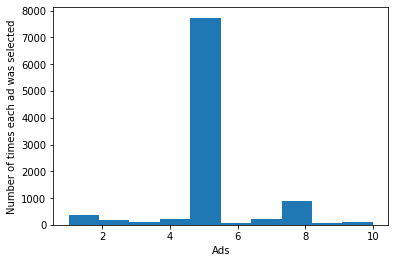

In [5]:
plt.hist(L)
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')

In [6]:
print("Total Number of AD clicks : " + str(TotalRew) + "/10000")

Total Number of AD clicks : 2406/10000
